In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [8]:
train_df = pd.read_csv("../data/train.csv", index_col=0)
test_df = pd.read_csv("../data/test.csv", index_col=0)

In [9]:
labels = train_df.Hazard
train_df.drop('Hazard', axis=1, inplace=True)
test_indices = test_df.index

In [10]:
train = np.array(train_df)
test = np.array(test_df)

In [13]:
# label encode the categorical variables
for i in range(train.shape[1]):
    if type(train[1,i]) is str:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[:,i]) + list(test[:,i]))
        train[:,i] = lbl.transform(train[:,i])
        test[:,i] = lbl.transform(test[:,i])

In [20]:
pca = PCA(n_components=.99)
pca.fit(train)
print(pca.explained_variance_ratio_)

[ 0.64052477  0.06432665  0.05164338  0.04207233  0.03922094  0.02987379
  0.02603612  0.02490861  0.02357659  0.01489704  0.00768363  0.00722604
  0.00592151  0.00450642  0.00414321  0.00340991  0.00269861]


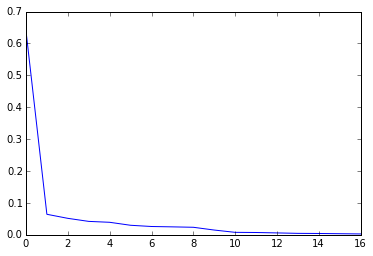

In [21]:
plt.plot(pca.explained_variance_ratio_)

In [23]:
X_transformed = pca.fit_transform(train)

In [24]:
X_transformed

array([[ 22.01162374,   2.19754923,  11.27036763, ...,   1.53965547,
         -1.04417373,  -1.70123699],
       [-20.55405931,  -4.98582315,   3.95064426, ...,   0.57172156,
          1.58933195,  -1.48897655],
       [-13.48570458,  -0.3266853 ,  -5.54985578, ...,   1.43911207,
          1.93231795,  -1.11377265],
       ..., 
       [ 25.34346385,  13.03272839,   8.31390124, ...,  -2.45240383,
          1.61030316,  -2.78485231],
       [ 21.96610902,   5.88872759,  -4.1787071 , ...,  -0.7016508 ,
          2.16486641,   0.02788798],
       [  8.57794066,  -3.44766162,  -5.01708422, ...,  -3.6427545 ,
         -0.1727401 ,  -0.91198843]])

In [25]:
def pca(data):
    pca = PCA(n_components=.99)
    print(pca.explained_variance_ratio_)
    return pca.fit_transform(data)